In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.regularizers import L1L2
from keras import regularizers

In [24]:
df = pd.read_csv("pcDataset.csv")
df

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
87978,-3.471593,-10.618559,0.802468,18
87979,-2.438870,-9.334789,1.514777,18
87980,-1.129311,-9.840170,1.750093,18
87981,-1.047292,-9.827171,2.336194,18


In [25]:
df.shape

(87983, 4)

In [26]:
print(sorted(Counter(df['Class']).items()))

[(1, 6348), (2, 6518), (3, 5467), (4, 5305), (5, 5927), (6, 6994), (7, 6759), (8, 6944), (9, 2462), (10, 6671), (11, 6350), (12, 11699), (13, 1890), (14, 1868), (15, 3828), (16, 1143), (17, 299), (18, 1511)]


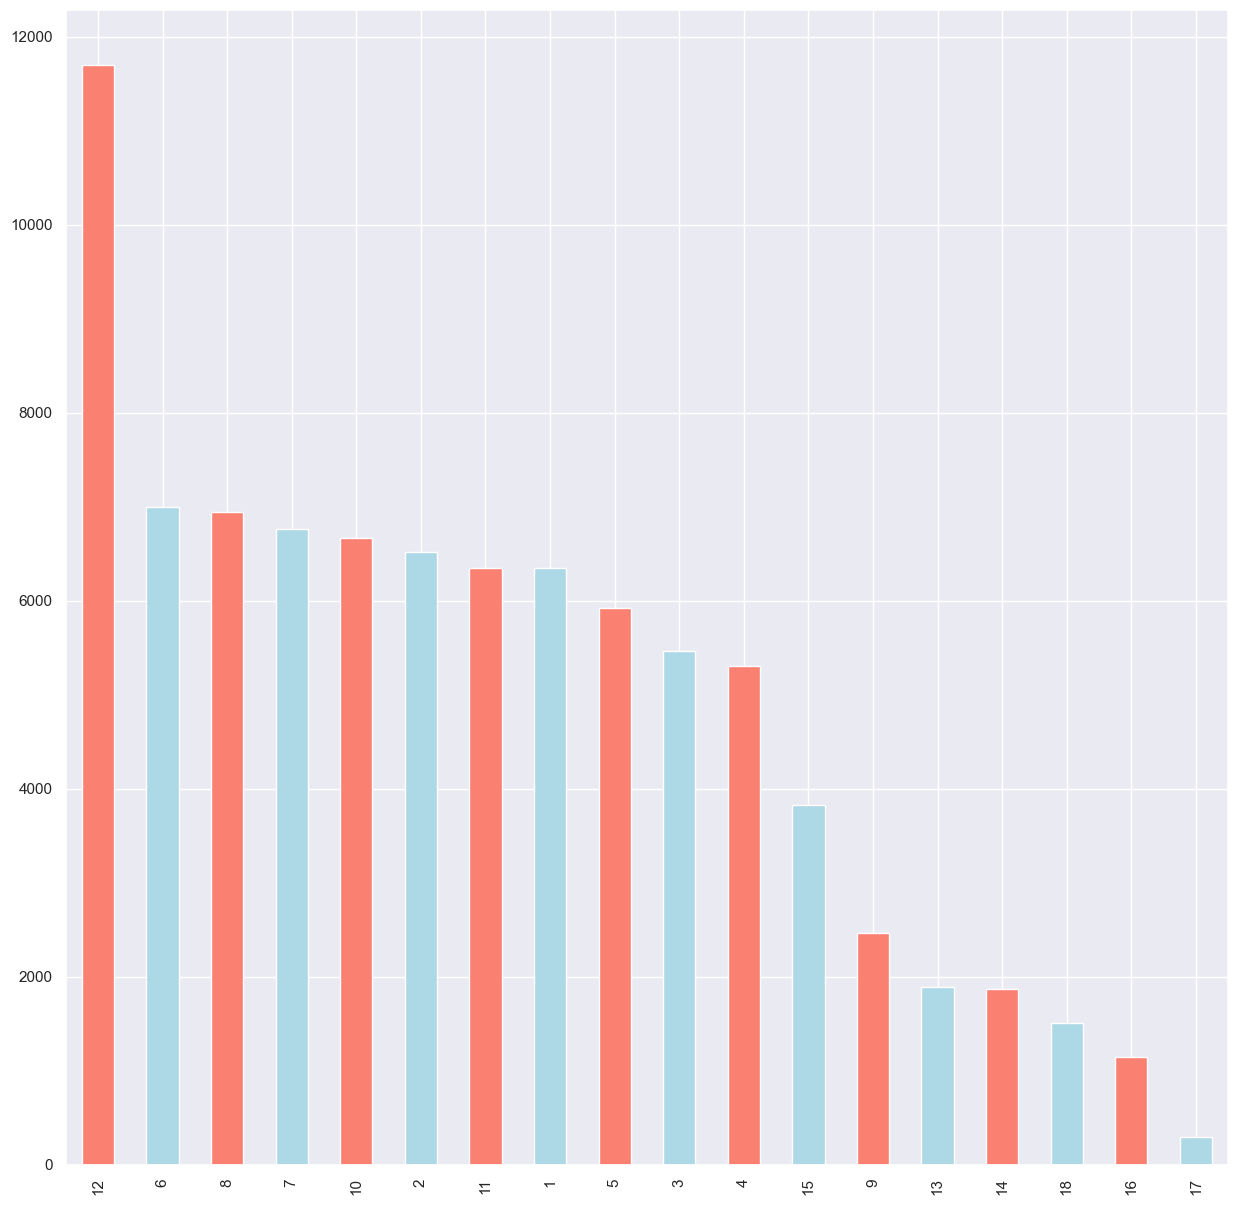

In [27]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [28]:
X = df
y = df['Class']
X.drop('Class',axis =1,inplace=True)

In [29]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state =0)
X_resampled, y_resampled = ros.fit_resample(X,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(1, 11699), (2, 11699), (3, 11699), (4, 11699), (5, 11699), (6, 11699), (7, 11699), (8, 11699), (9, 11699), (10, 11699), (11, 11699), (12, 11699), (13, 11699), (14, 11699), (15, 11699), (16, 11699), (17, 11699), (18, 11699)] (210582,)


In [30]:
X=X_resampled
y=y_resampled

In [31]:
df = X
df['Class'] =y

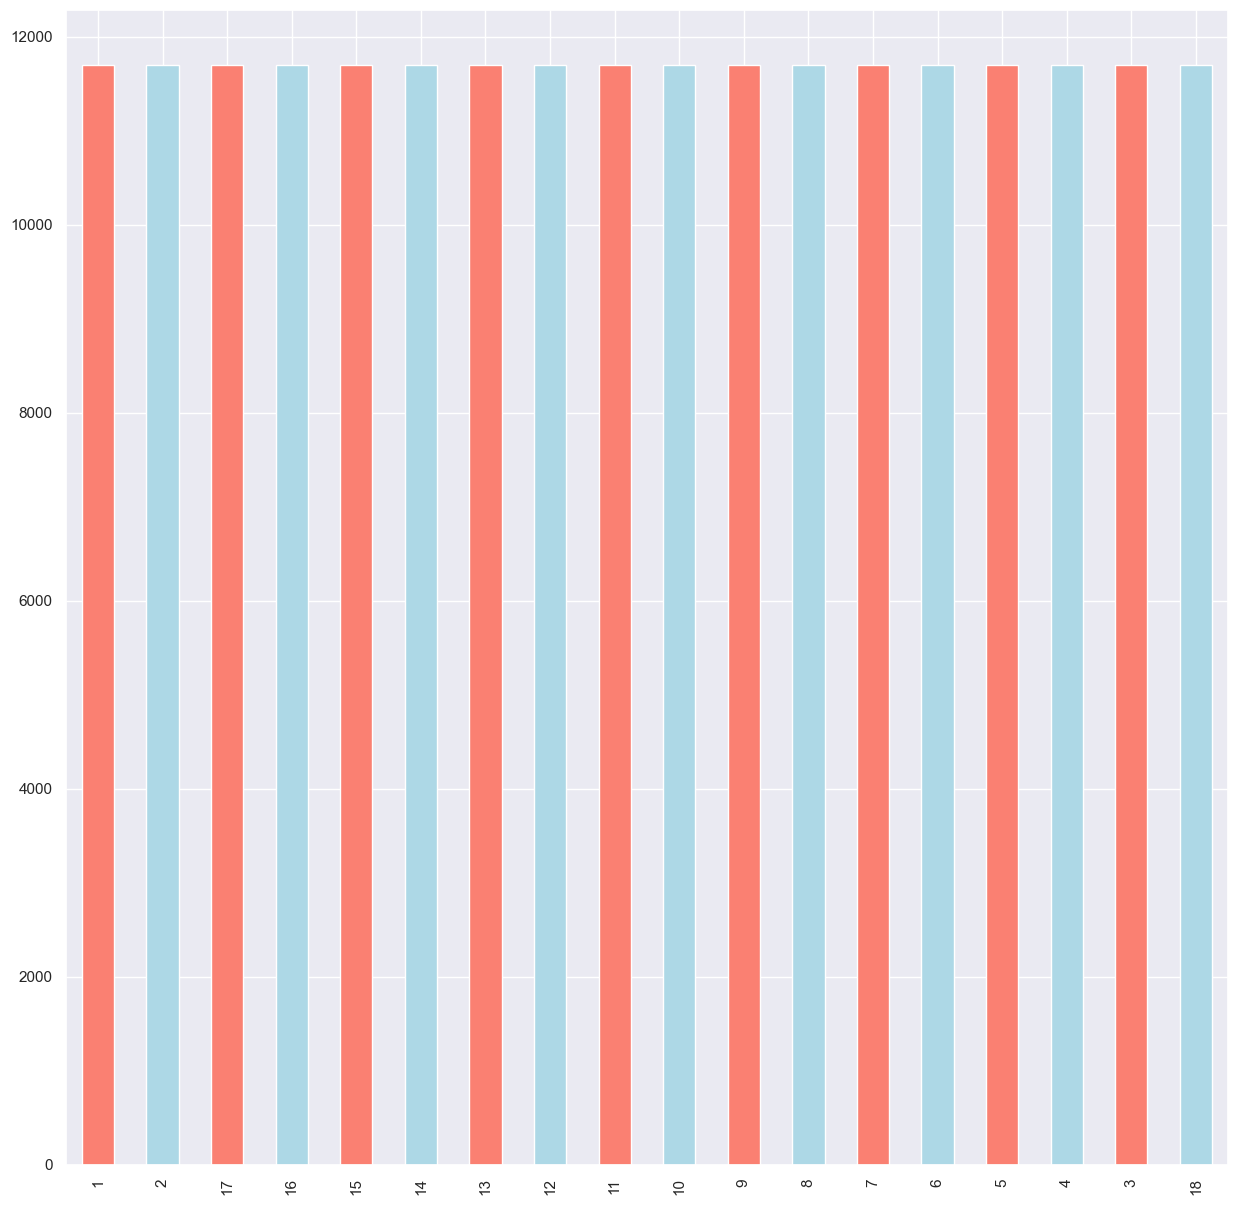

In [32]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [33]:
print("DF HEAD: ",df.head)
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)

print("DF ISNULL: ",df.isnull().sum())

DF HEAD:  <bound method NDFrame.head of            Acc_X      Acc_Y     Acc_Z  Class
0       2.660984  -9.653030  0.470237      1
1       2.223091   2.223091  2.223091      1
2       2.098372  -9.481953  0.926070      1
3       2.716461  -9.739352  0.912008      1
4       2.288388  -9.371498  0.910390      1
...          ...        ...       ...    ...
210577  0.288102 -12.288440 -0.584185     18
210578 -1.901543 -10.402466 -1.259966     18
210579 -1.600324 -10.205883 -2.548428     18
210580 -4.638875 -12.719522 -0.283604     18
210581 -1.679932 -10.199300 -1.668360     18

[210582 rows x 4 columns]>
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
Class      int64
dtype: object
DF SHAPE:  (210582, 4)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64


In [34]:
import plotly.express as px
dfv= df[["Acc_X","Acc_Y","Acc_Z"]]
dfbv=dfv.isnull().sum()


sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(dfbv,title="Checking for Null values")

fig.show()

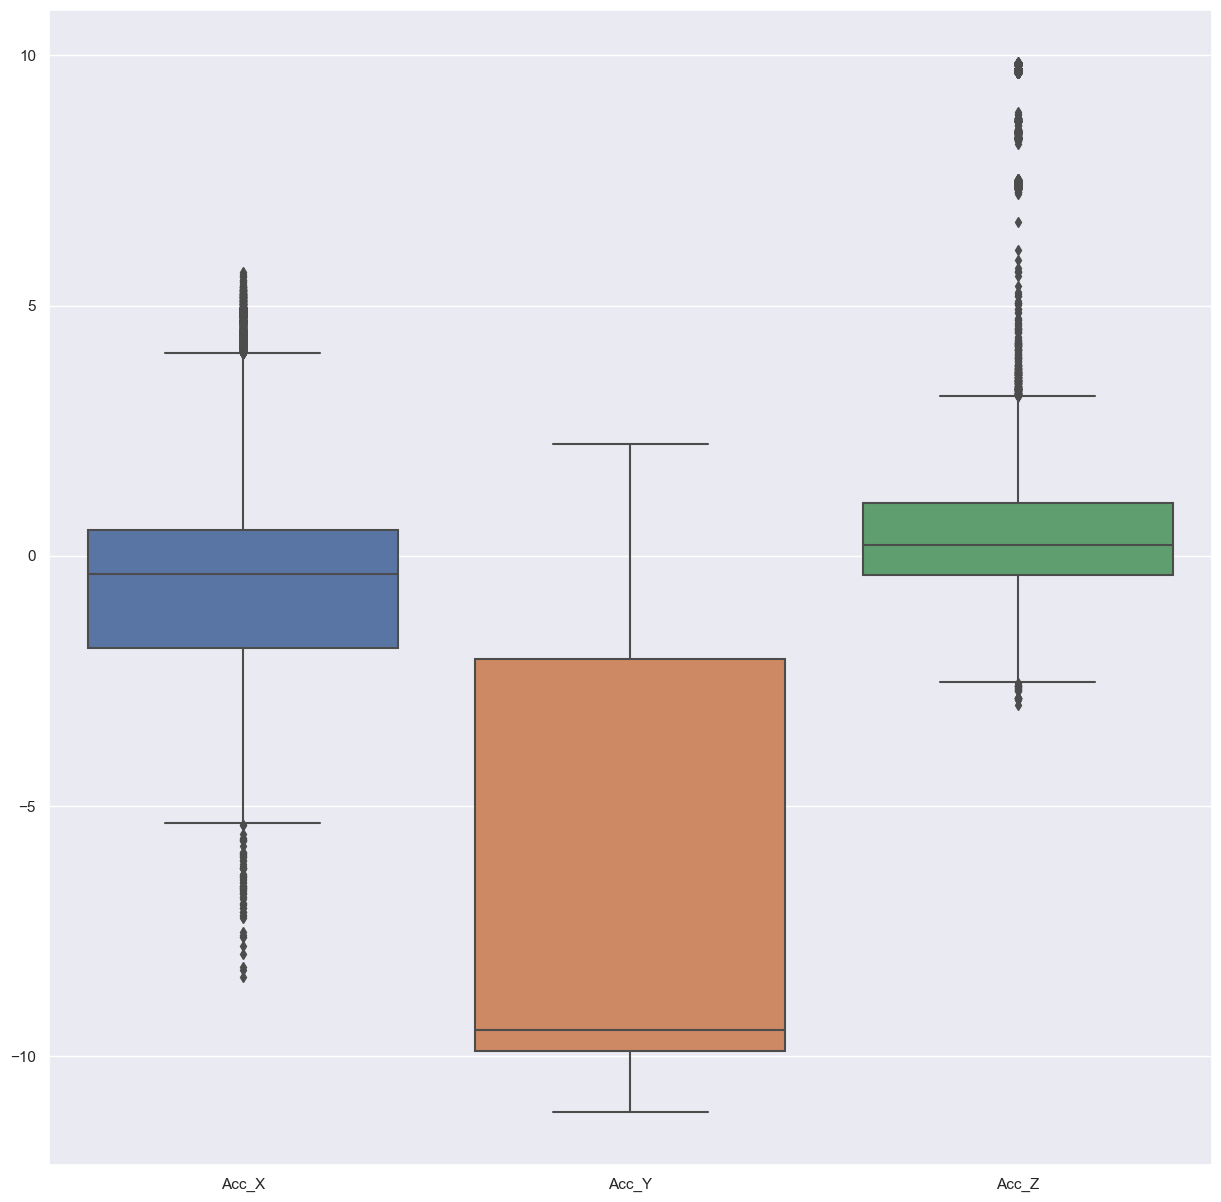

In [35]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")


In [36]:
f=0
g=0
p=0

#finding first and last index of every class
ind=df.index.to_series().groupby(df['Class']).agg(['first','last']).reset_index()
print(ind)

    Class  first    last
0       1      0   93333
1       2   6348   98514
2       3  12866  104746
3       4  18333  111140
4       5  23638  116912
5       6  29565  121617
6       7  36559  126557
7       8  43318  131312
8       9  50262  140549
9      10  52724  145577
10     11  59395  150926
11     12  65745   77443
12     13  77444  160735
13     14  79334  170566
14     15  81202  178437
15     16  85030  188993
16     17  86173  200393
17     18  86472  210581


In [37]:
for m in range(1,19):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        #print("For i=i.value")
        tenth= A.iloc[:,i].quantile(0.10)
        ninety=A.iloc[:,i].quantile(0.90)
        #print(Avg)
        Q1 = A.iloc[:,i].quantile(0.25)
        #print(Q1)
        Q3 = A.iloc[:,i].quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        lim1=(Q1 - 1.5 * IQR)
        
        #print(lim1)
        lim2=(Q3 + 1.5 * IQR)
        #print(lim2)
        #print(IQR)
        for ami in range(first,last+1):
            com=df.iloc[ami,i]
            if(com < lim1):
                df.iloc[ami,i] = tenth
                f=f+1
            elif(com > lim2):
                df.iloc[ami,i] = ninety
                f=f+1
                
        print(f)
    if(p<17):
        p=p+1

(11699, 4)
0
93333
380
58148
(11699, 4)
6348
98514
102077
178008
(11699, 4)
12866
104746
178375
178375
(11699, 4)
18333
111140
178376
184886
(11699, 4)
23638
116912
217669
217669
(11699, 4)
29565
121617
220488
220488
(11699, 4)
36559
126557
227541
227541
(11699, 4)
43318
131312
232839
232839
(11699, 4)
50262
140549
239478
239478
(11699, 4)
52724
145577
241935
266630
(11699, 4)
59395
150926
274559
274602
(11699, 4)
65745
77443
274884
274949
(11699, 4)
77444
160735
278449
324430
(11699, 4)
79334
170566
346401
397739
(11699, 4)
81202
178437
398065
399795
(11699, 4)
85030
188993
399838
400002
(11699, 4)
86173
200393
400031
400114
(11699, 4)
86472
210581
428382
440914


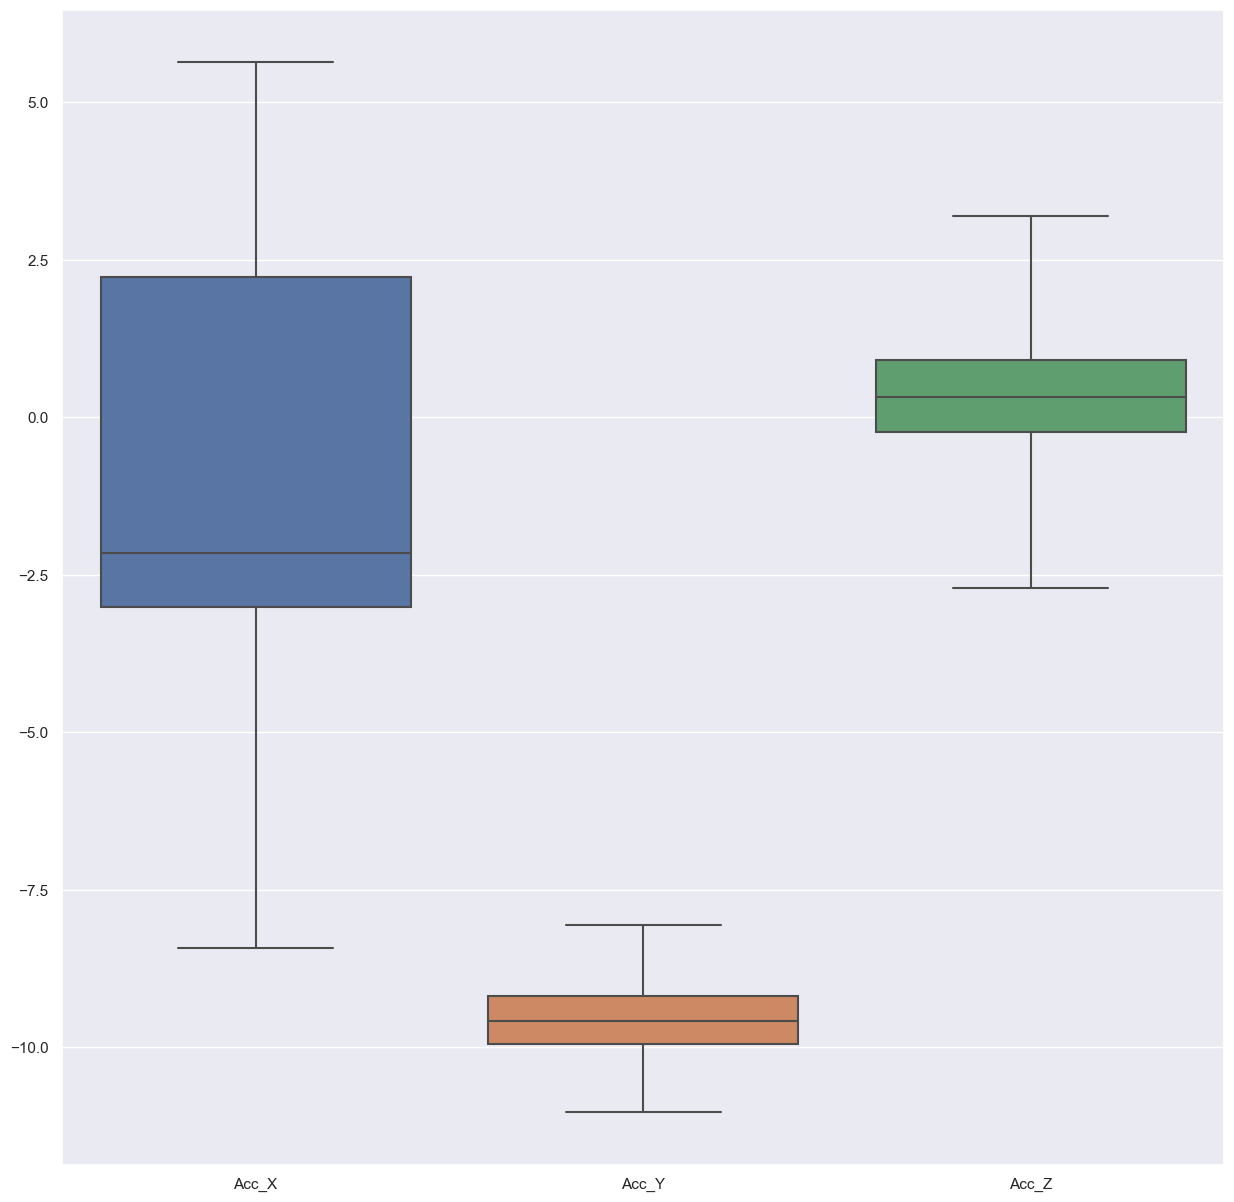

In [38]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:6000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers(Final Har_intensity).png")

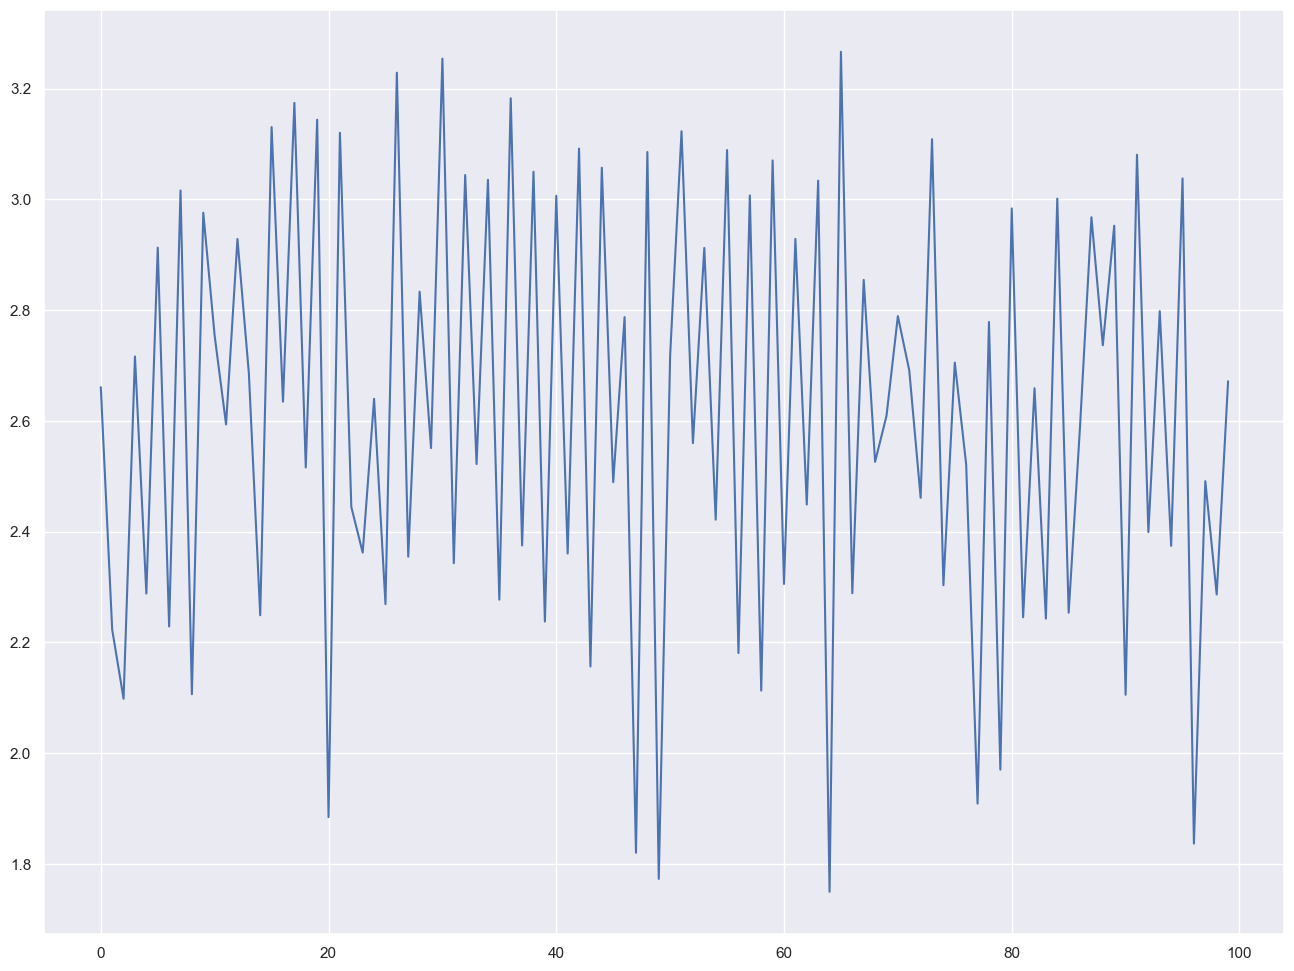

In [39]:
a = df.Acc_X
a = a[:100]
bx = a.plot(subplots=True,figsize=(16,12))

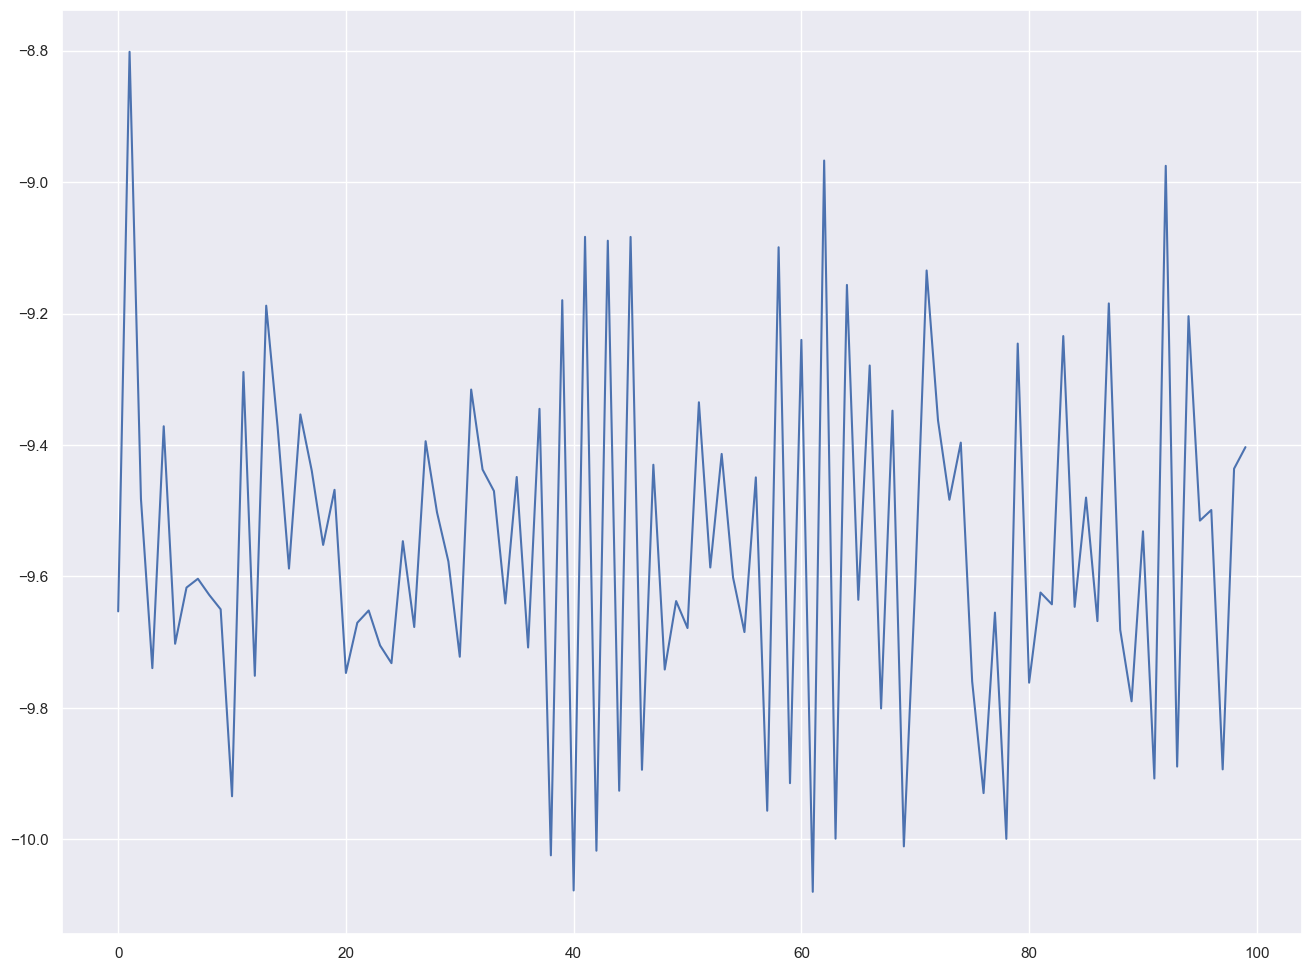

In [40]:
b = df.Acc_Y
b = b[:100]
bx = b.plot(subplots=True,figsize=(16,12))

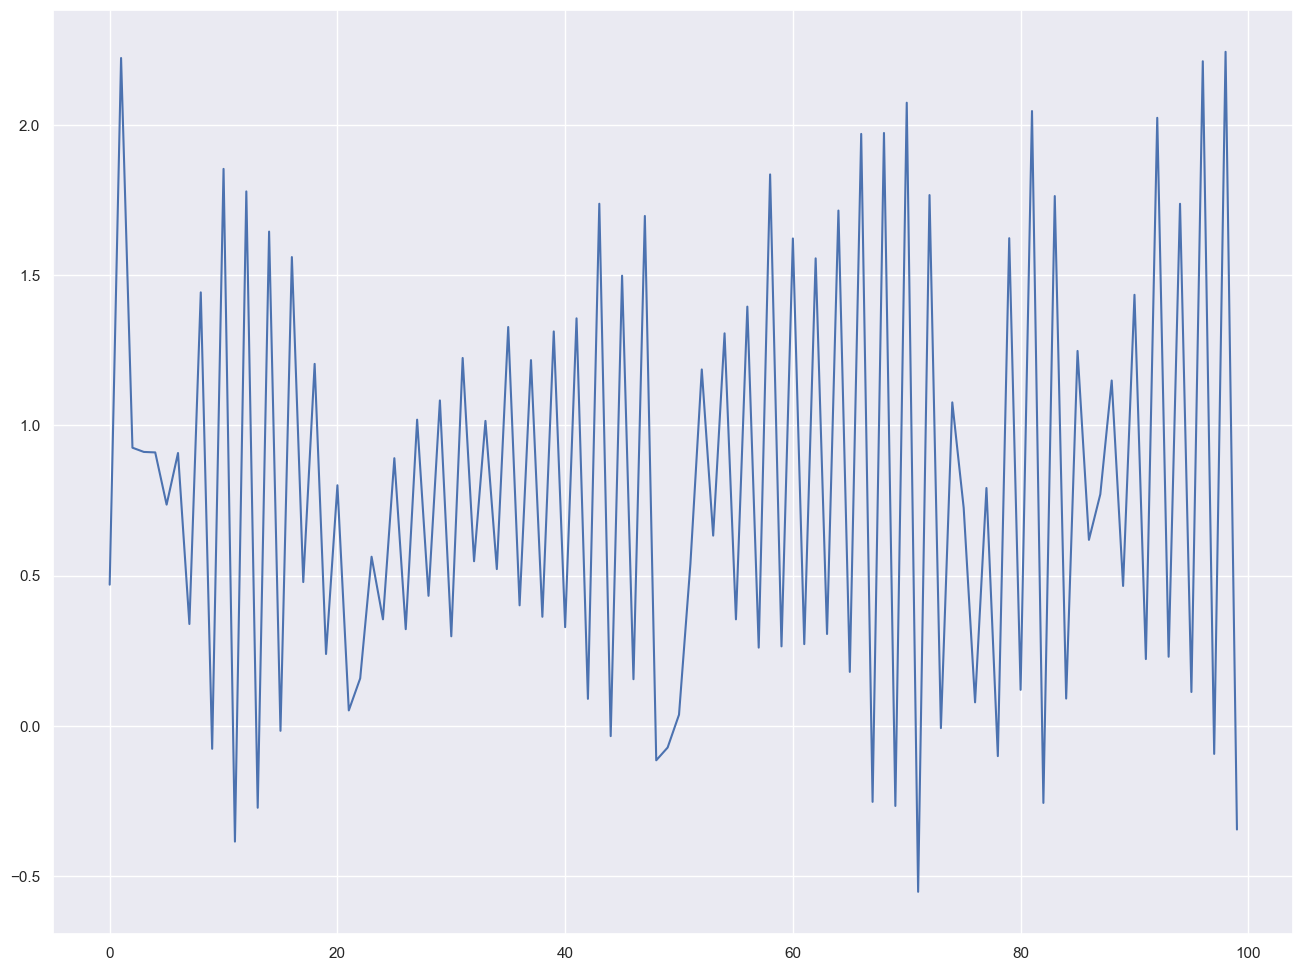

In [41]:
c = df.Acc_Z
c = c[:100]
cx = c.plot(subplots=True,figsize=(16,12))

In [42]:
#butter worth filtering
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y


p=0 

#filtering data with low pass filter
for m in range(1,19):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,3):
        df.iloc[first:last+1,i]= butter_lowpass_filter(df.iloc[first:last+1,i], 10, 100, 10)
    if(p<17):
        p = p+1

(11699, 4)
0
93333
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 

[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1

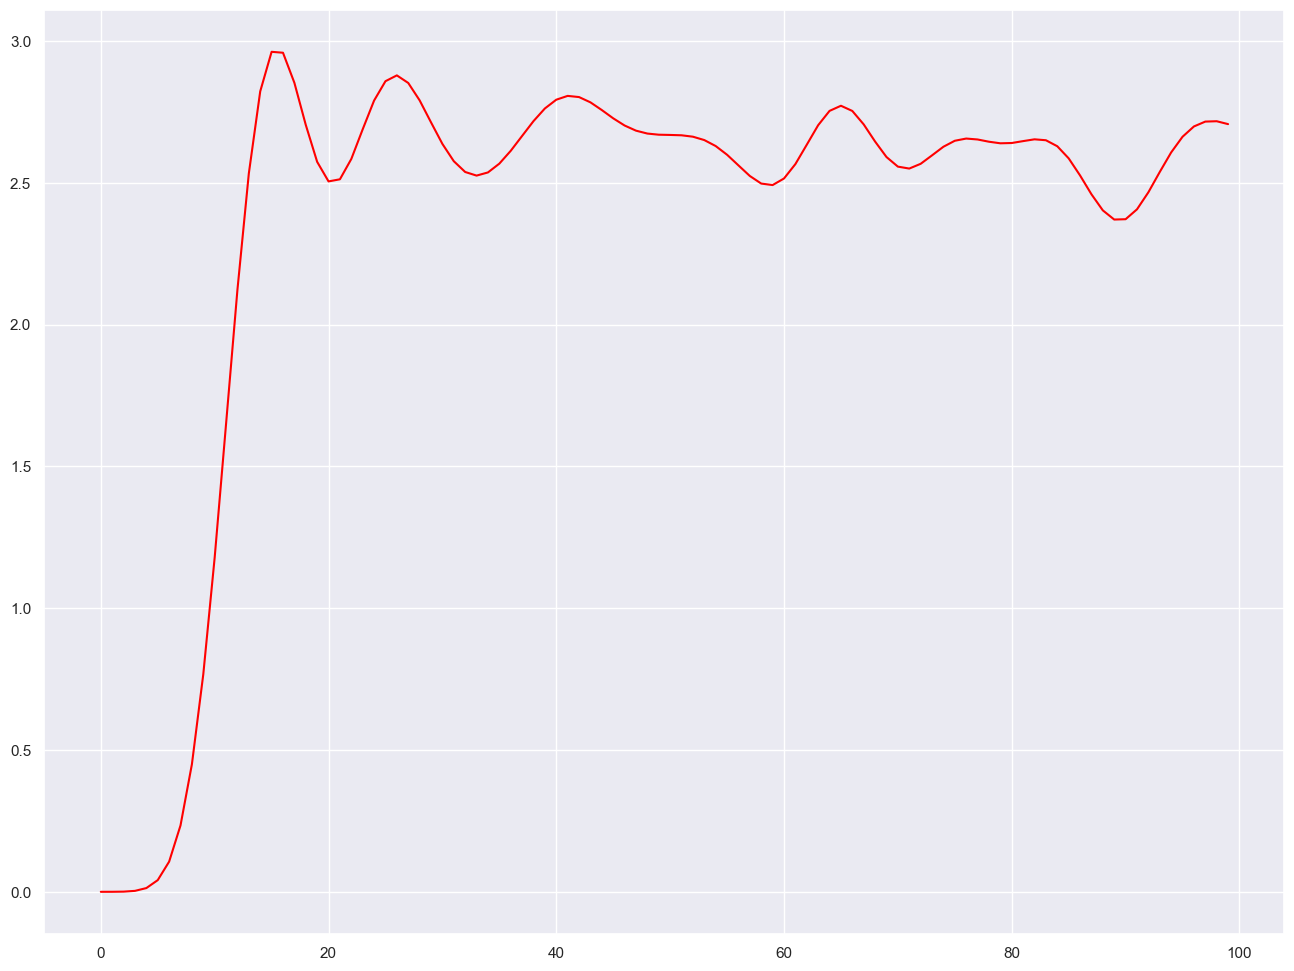

In [43]:
d = df.Acc_X
d = d[:100]
dx = d.plot(subplots=True,figsize=(16,12),color="red")

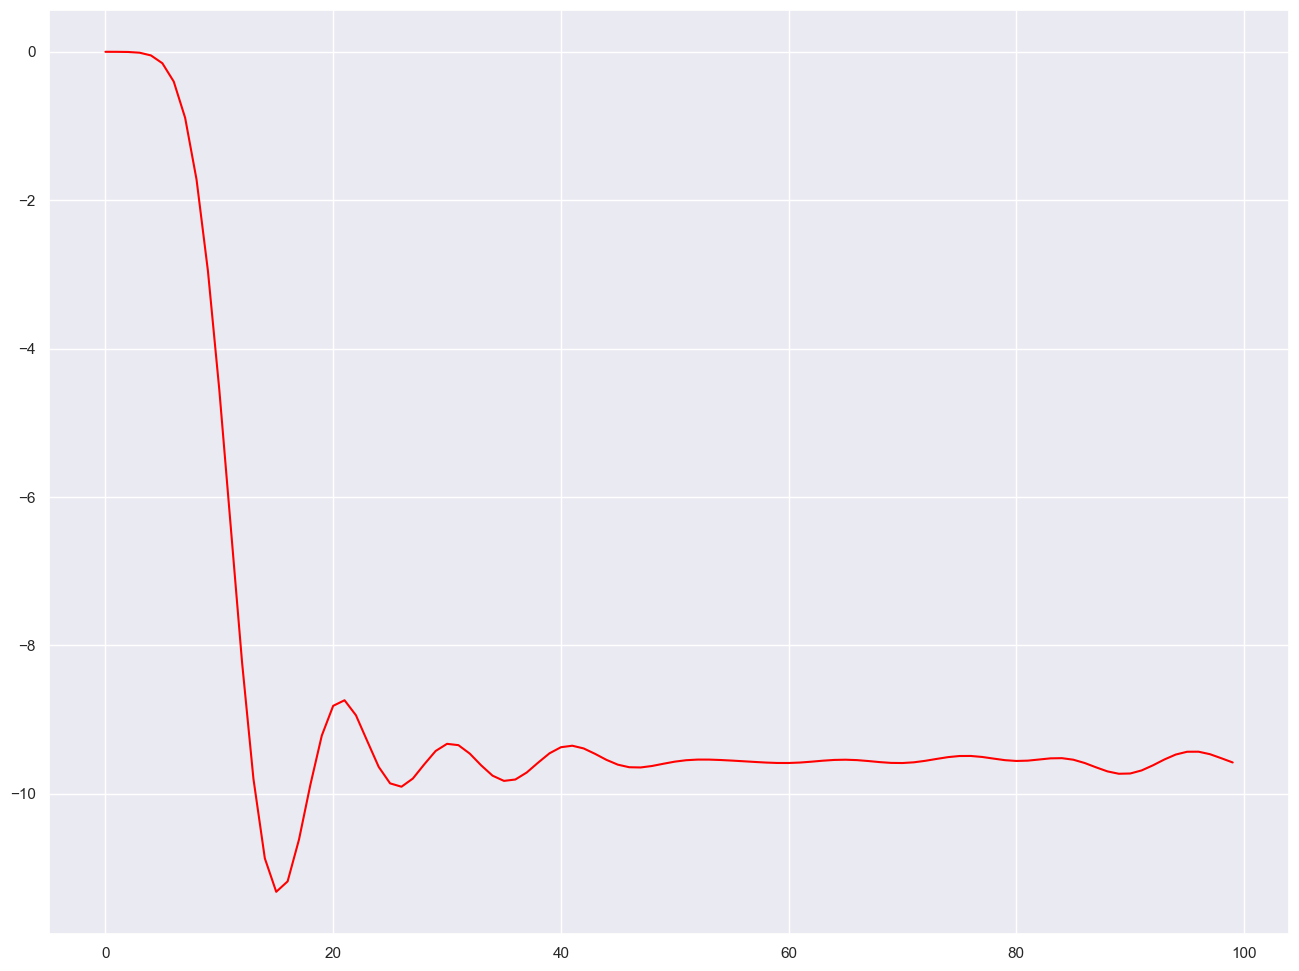

In [44]:
e = df.Acc_Y
e = e[:100]
ex = e.plot(subplots=True,figsize=(16,12),color="red")

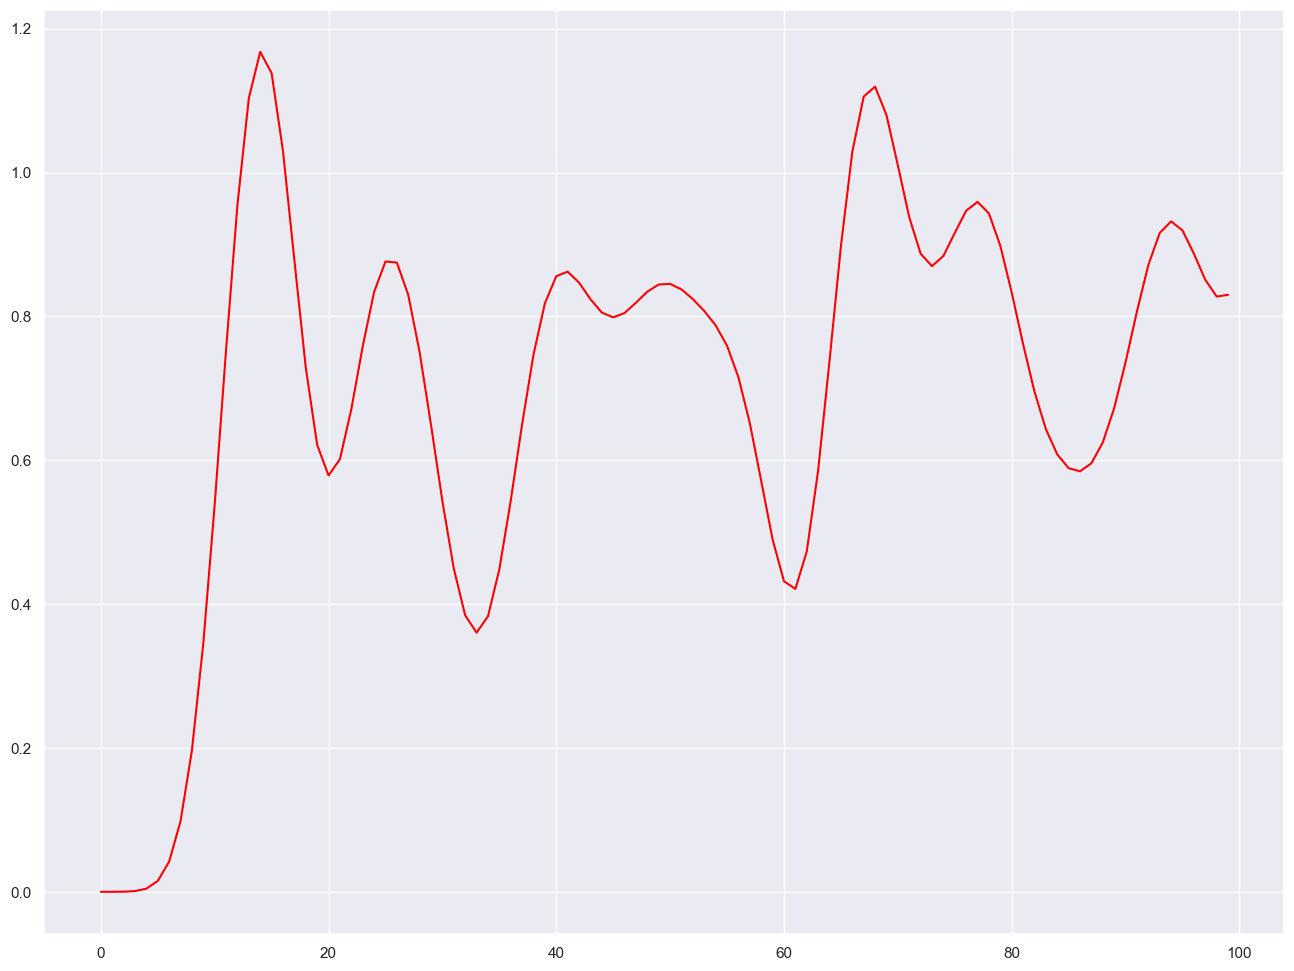

In [45]:
f = df.Acc_Z
f = f[:100]
fx = f.plot(subplots=True,figsize=(16,12),color="red")

In [46]:
#feature enginerring
df=df.eval('Mean = (Acc_X+Acc_Y+Acc_Z)/3')
df['Median']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].median(axis=1)
df['Variance']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].var(axis=1)
df['Standard_Deviation']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].std(axis=1)
df

,Acc_X,Acc_Y,Acc_Z,Class,Mean,Median,Variance,Standard_Deviation
0,0.000004,-0.000016,7.916823e-07,1,-0.000004,7.916823e-07,1.223134e-10,0.000011
1,0.000075,-0.000275,1.639985e-05,1,-0.000061,1.639985e-05,3.511515e-08,0.000187
2,0.000619,-0.002269,1.596088e-04,1,-0.000497,1.596088e-04,2.408401e-06,0.001552
3,0.003323,-0.012259,9.851752e-04,1,-0.002650,9.851752e-04,7.061404e-05,0.008403
4,0.013159,-0.048901,4.378206e-03,1,-0.010455,4.378206e-03,1.127895e-03,0.033584
...,...,...,...,...,...,...,...,...
210577,-0.526774,-10.187329,-8.520435e-01,18,-3.855382,-8.520435e-01,3.009661e+01,5.486038
210578,-0.660666,-10.228762,-8.602814e-01,18,-3.916570,-8.602814e-01,2.989279e+01,5.467430
210579,-0.878140,-10.219747,-4.692337e-01,18,-3.855707,-8.781399e-01,3.041755e+01,5.515211
210580,-1.153949,-10.166760,2.001867e-01,18,-3.706841,-1.153949e+00,3.175634e+01,5.635276


In [47]:
sort=np.sort(df.loc[:,['Acc_X','Acc_Y','Acc_Z']],axis=1)

q3=[]
q1=[]
for x in sort:

    q3x,q1x= np.percentile(x,[75,25])
    q3.append(q3x)
    q1.append(q1x)
df['Q3']=q3
df['Q1']=q1
df

,Acc_X,Acc_Y,Acc_Z,Class,Mean,Median,Variance,Standard_Deviation,Q3,Q1
0,0.000004,-0.000016,7.916823e-07,1,-0.000004,7.916823e-07,1.223134e-10,0.000011,0.000003,-0.000008
1,0.000075,-0.000275,1.639985e-05,1,-0.000061,1.639985e-05,3.511515e-08,0.000187,0.000046,-0.000129
2,0.000619,-0.002269,1.596088e-04,1,-0.000497,1.596088e-04,2.408401e-06,0.001552,0.000389,-0.001055
3,0.003323,-0.012259,9.851752e-04,1,-0.002650,9.851752e-04,7.061404e-05,0.008403,0.002154,-0.005637
4,0.013159,-0.048901,4.378206e-03,1,-0.010455,4.378206e-03,1.127895e-03,0.033584,0.008769,-0.022262
...,...,...,...,...,...,...,...,...,...,...
210577,-0.526774,-10.187329,-8.520435e-01,18,-3.855382,-8.520435e-01,3.009661e+01,5.486038,-0.689409,-5.519686
210578,-0.660666,-10.228762,-8.602814e-01,18,-3.916570,-8.602814e-01,2.989279e+01,5.467430,-0.760474,-5.544522
210579,-0.878140,-10.219747,-4.692337e-01,18,-3.855707,-8.781399e-01,3.041755e+01,5.515211,-0.673687,-5.548943
210580,-1.153949,-10.166760,2.001867e-01,18,-3.706841,-1.153949e+00,3.175634e+01,5.635276,-0.476881,-5.660355


In [48]:
for index, row in df.iterrows():
     rms=np.sqrt(((df['Acc_X'] ** 2) + (df['Acc_Y'] ** 2) +(df['Acc_Z'] ** 2))/3)
df['RMS']=rms
df

,Acc_X,Acc_Y,Acc_Z,Class,Mean,Median,Variance,Standard_Deviation,Q3,Q1,RMS
0,0.000004,-0.000016,7.916823e-07,1,-0.000004,7.916823e-07,1.223134e-10,0.000011,0.000003,-0.000008,0.000010
1,0.000075,-0.000275,1.639985e-05,1,-0.000061,1.639985e-05,3.511515e-08,0.000187,0.000046,-0.000129,0.000165
2,0.000619,-0.002269,1.596088e-04,1,-0.000497,1.596088e-04,2.408401e-06,0.001552,0.000389,-0.001055,0.001361
3,0.003323,-0.012259,9.851752e-04,1,-0.002650,9.851752e-04,7.061404e-05,0.008403,0.002154,-0.005637,0.007355
4,0.013159,-0.048901,4.378206e-03,1,-0.010455,4.378206e-03,1.127895e-03,0.033584,0.008769,-0.022262,0.029347
...,...,...,...,...,...,...,...,...,...,...,...
210577,-0.526774,-10.187329,-8.520435e-01,18,-3.855382,-8.520435e-01,3.009661e+01,5.486038,-0.689409,-5.519686,5.910024
210578,-0.660666,-10.228762,-8.602814e-01,18,-3.916570,-8.602814e-01,2.989279e+01,5.467430,-0.760474,-5.544522,5.938691
210579,-0.878140,-10.219747,-4.692337e-01,18,-3.855707,-8.781399e-01,3.041755e+01,5.515211,-0.673687,-5.548943,5.928309
210580,-1.153949,-10.166760,2.001867e-01,18,-3.706841,-1.153949e+00,3.175634e+01,5.635276,-0.476881,-5.660355,5.908601


In [49]:
C=df

In [50]:
#separating target column
X = C.drop('Class', axis=1)  
y = C['Class']

Feature: 0, Score: 0.06790
Feature: 1, Score: 0.10768
Feature: 2, Score: 0.14570
Feature: 3, Score: 0.20607
Feature: 4, Score: 0.08224
Feature: 5, Score: 0.10121
Feature: 6, Score: 0.10700
Feature: 7, Score: 0.04550
Feature: 8, Score: 0.09223
Feature: 9, Score: 0.04448


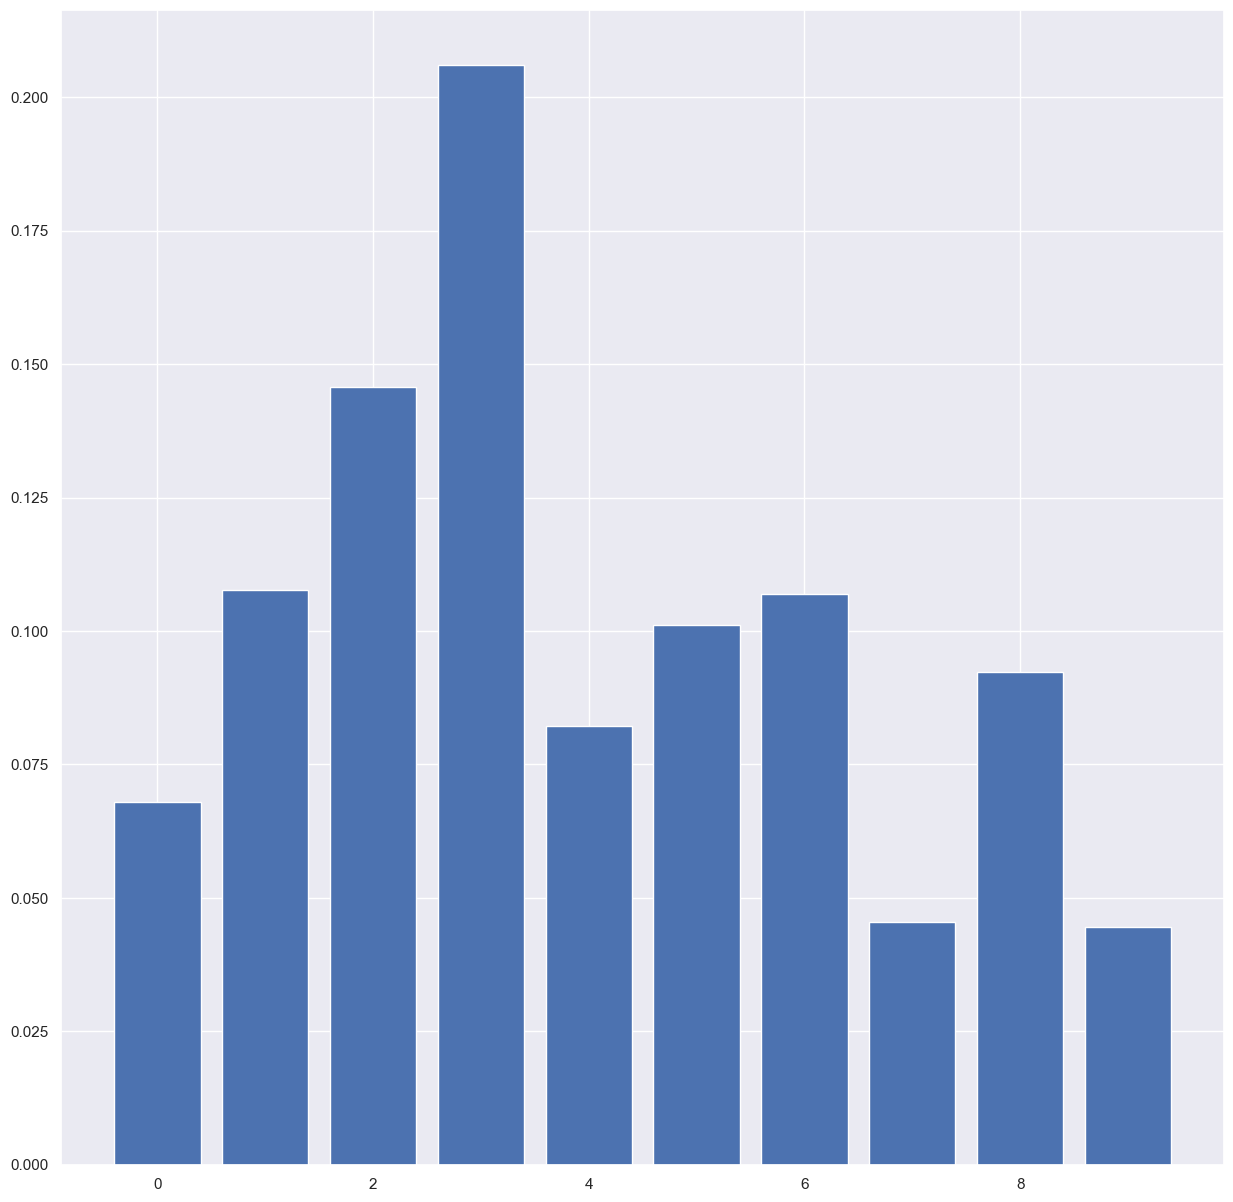

In [51]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [52]:
#taking filtered data into new dataframe
B=df
B

,Acc_X,Acc_Y,Acc_Z,Class,Mean,Median,Variance,Standard_Deviation,Q3,Q1,RMS
0,0.000004,-0.000016,7.916823e-07,1,-0.000004,7.916823e-07,1.223134e-10,0.000011,0.000003,-0.000008,0.000010
1,0.000075,-0.000275,1.639985e-05,1,-0.000061,1.639985e-05,3.511515e-08,0.000187,0.000046,-0.000129,0.000165
2,0.000619,-0.002269,1.596088e-04,1,-0.000497,1.596088e-04,2.408401e-06,0.001552,0.000389,-0.001055,0.001361
3,0.003323,-0.012259,9.851752e-04,1,-0.002650,9.851752e-04,7.061404e-05,0.008403,0.002154,-0.005637,0.007355
4,0.013159,-0.048901,4.378206e-03,1,-0.010455,4.378206e-03,1.127895e-03,0.033584,0.008769,-0.022262,0.029347
...,...,...,...,...,...,...,...,...,...,...,...
210577,-0.526774,-10.187329,-8.520435e-01,18,-3.855382,-8.520435e-01,3.009661e+01,5.486038,-0.689409,-5.519686,5.910024
210578,-0.660666,-10.228762,-8.602814e-01,18,-3.916570,-8.602814e-01,2.989279e+01,5.467430,-0.760474,-5.544522,5.938691
210579,-0.878140,-10.219747,-4.692337e-01,18,-3.855707,-8.781399e-01,3.041755e+01,5.515211,-0.673687,-5.548943,5.928309
210580,-1.153949,-10.166760,2.001867e-01,18,-3.706841,-1.153949e+00,3.175634e+01,5.635276,-0.476881,-5.660355,5.908601


In [53]:
#separating target column
X = B.drop('Class', axis=1)  
y = B['Class']

In [54]:
N_TIME_STEPS = 10
N_FEATURES = 10
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(B) - N_TIME_STEPS, step):
    accxs = B['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = B['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = B['Acc_Z'].values[i: i + N_TIME_STEPS]
    mean = B['Mean'].values[i: i + N_TIME_STEPS]
    median = B['Median'].values[i: i + N_TIME_STEPS]
    variance = B['Variance'].values[i: i + N_TIME_STEPS]
    SD = B['Standard_Deviation'].values[i: i + N_TIME_STEPS]
    rms = B['RMS'].values[i: i + N_TIME_STEPS]
    q3 = B['Q3'].values[i: i + N_TIME_STEPS]
    q1 = B['Q1'].values[i: i + N_TIME_STEPS]
    


    label = stats.mode(B['Class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs,mean,median,variance,SD,rms,q3,q1]) 
    labels.append(label)
    

print("SEGMENTS SHAPE: ",np.array(segments).shape)
print("LABELS SHAPE: ",np.array(labels).shape)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7136\3046773090.py:22: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



SEGMENTS SHAPE:  (210572, 10, 10)
LABELS SHAPE:  (210572,)


In [55]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int64)

print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels[0])

RESHAPE SHAPE:  (210572, 10, 10)
LABELS:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [56]:
print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels.shape)

RESHAPE SHAPE:  (210572, 10, 10)
LABELS:  (210572, 18)


In [ ]:
#labels

In [63]:
from sklearn.model_selection import KFold
from sklearn import metrics
random_seed = 42  
n_splits = 5
kf = KFold(n_splits=n_splits)
all_predicted_labels = []
all_actual_labels = []
accuracy_scores = []
loss_scores = []
for fold, (train_index, test_index) in enumerate(kf.split(reshaped_segments, labels)):
    X_train, X_test = reshaped_segments[train_index], reshaped_segments[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    # further split X_train, y_train into train and validation sets
    # problem ache train,testing r validation er counting e..thik krte hbe
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=random_seed, stratify=y_train)
#     X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20)
    print("X_train shape: {}".format(X_train.shape))
    print("X_test shape: {}".format(X_test.shape))
    print("y_train shape: {}".format(y_train.shape))
    print("y_test shape: {}".format(y_test.shape))
    print("X_val shape: {}".format(X_val.shape))
    print("y val shape: {}".format(y_val.shape)) 
    # train and evaluate model on this fold
    # Initialising the LSTM
    classifier = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
#     classifier.add(LSTM(units = 256, return_sequences = True, activation='tanh'))
#     classifier.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
    classifier.add(LSTM(units = 128, return_sequences = True, activation='tanh'))
    classifier.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
#     classifier.add(LSTM(units = 64, return_sequences = True, activation='relu'))
#     classifier.add(Dropout(0.2))
    classifier.add(LSTM(units = 32, activation='tanh'))
    classifier.add(Dropout(0.2))

# # Adding a fourth LSTM layer and some Dropout regularisation
  
# # Adding the output layer
    classifier.add(Dense(units = 18, activation='softmax'))
# Compiling the LSTM
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])  # define your LSTM model here
    history=classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=32)
# Evaluate the model on the test set
    loss, accuracy = classifier.evaluate(X_test, y_test, batch_size=32)

    # Store the evaluation scores
    
    accuracy_scores.append(accuracy)
    loss_scores.append(loss)
    predicted_labels = classifier.predict(X_test)
    predicted_labels = np.argmax(predicted_labels, axis=1)  # Convert probabilities to class labels
    actual_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

    # Append predicted and actual labels to the overall lists
    all_predicted_labels.extend(predicted_labels)
    all_actual_labels.extend(actual_labels)

# Calculate the average evaluation scores across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_loss = np.mean(loss_scores)

# Print the average scores
print(f'Average Accuracy: {avg_accuracy}')
print(f'Average Loss: {avg_loss}')
cm = confusion_matrix(all_actual_labels, all_predicted_labels)
print(cm)

X_train shape: (134765, 10, 10)
X_test shape: (42115, 10, 10)
y_train shape: (134765, 18)
y_test shape: (42115, 18)
X_val shape: (33692, 10, 10)
y val shape: (33692, 18)
Epoch 1/40
4212/4212 [==============================] - 66s 14ms/step - loss: 0.9790 - accuracy: 0.6730 - val_loss: 0.7707 - val_accuracy: 0.7389
Epoch 2/40
4212/4212 [==============================] - 63s 15ms/step - loss: 0.7222 - accuracy: 0.7590 - val_loss: 0.6040 - val_accuracy: 0.7970
Epoch 3/40
4212/4212 [==============================] - 65s 15ms/step - loss: 0.6080 - accuracy: 0.7996 - val_loss: 0.5196 - val_accuracy: 0.8213
Epoch 4/40
4212/4212 [==============================] - 67s 16ms/step - loss: 0.5419 - accuracy: 0.8192 - val_loss: 0.5022 - val_accuracy: 0.8282
Epoch 5/40
4212/4212 [==============================] - 66s 16ms/step - loss: 0.5024 - accuracy: 0.8333 - val_loss: 0.4590 - val_accuracy: 0.8441
Epoch 6/40
4212/4212 [==============================] - 68s 16ms/step - loss: 0.4775 - accuracy: 0.8

4212/4212 [==============================] - 66s 16ms/step - loss: 0.3512 - accuracy: 0.8781 - val_loss: 0.3374 - val_accuracy: 0.8774
Epoch 14/40
4212/4212 [==============================] - 67s 16ms/step - loss: 0.3434 - accuracy: 0.8813 - val_loss: 0.3063 - val_accuracy: 0.8915
Epoch 15/40
4212/4212 [==============================] - 66s 16ms/step - loss: 0.3384 - accuracy: 0.8824 - val_loss: 0.5303 - val_accuracy: 0.8272
Epoch 16/40
4212/4212 [==============================] - 98s 23ms/step - loss: 0.3369 - accuracy: 0.8829 - val_loss: 0.3198 - val_accuracy: 0.8892
Epoch 17/40
4212/4212 [==============================] - 123s 29ms/step - loss: 0.3298 - accuracy: 0.8843 - val_loss: 0.2930 - val_accuracy: 0.8944
Epoch 18/40
4212/4212 [==============================] - 122s 29ms/step - loss: 0.3209 - accuracy: 0.8887 - val_loss: 0.3028 - val_accuracy: 0.8914
Epoch 19/40
4212/4212 [==============================] - 122s 29ms/step - loss: 0.3169 - accuracy: 0.8895 - val_loss: 0.3014 - v

4212/4212 [==============================] - 65s 15ms/step - loss: 0.2666 - accuracy: 0.9080 - val_loss: 0.2397 - val_accuracy: 0.9154
Epoch 27/40
4212/4212 [==============================] - 65s 15ms/step - loss: 0.2639 - accuracy: 0.9092 - val_loss: 0.2571 - val_accuracy: 0.9059
Epoch 28/40
4212/4212 [==============================] - 64s 15ms/step - loss: 0.2597 - accuracy: 0.9104 - val_loss: 0.2950 - val_accuracy: 0.8967
Epoch 29/40
4212/4212 [==============================] - 65s 15ms/step - loss: 0.2546 - accuracy: 0.9122 - val_loss: 0.2373 - val_accuracy: 0.9161
Epoch 30/40
4212/4212 [==============================] - 65s 15ms/step - loss: 0.2517 - accuracy: 0.9129 - val_loss: 0.2470 - val_accuracy: 0.9175
Epoch 31/40
4212/4212 [==============================] - 64s 15ms/step - loss: 0.2490 - accuracy: 0.9144 - val_loss: 0.2349 - val_accuracy: 0.9196
Epoch 32/40
4212/4212 [==============================] - 65s 15ms/step - loss: 0.2462 - accuracy: 0.9148 - val_loss: 0.2163 - val_

Epoch 40/40
1317/1317 [==============================] - 8s 5ms/step
X_train shape: (134766, 10, 10)
X_test shape: (42114, 10, 10)
y_train shape: (134766, 18)
y_test shape: (42114, 18)
X_val shape: (33692, 10, 10)
y val shape: (33692, 18)
Epoch 1/40
4212/4212 [==============================] - 89s 20ms/step - loss: 1.2010 - accuracy: 0.5635 - val_loss: 0.8518 - val_accuracy: 0.6907
Epoch 2/40
4212/4212 [==============================] - 83s 20ms/step - loss: 0.8383 - accuracy: 0.6999 - val_loss: 0.6726 - val_accuracy: 0.7615
Epoch 3/40
4212/4212 [==============================] - 83s 20ms/step - loss: 0.7074 - accuracy: 0.7518 - val_loss: 0.5975 - val_accuracy: 0.7872
Epoch 4/40
4212/4212 [==============================] - 79s 19ms/step - loss: 0.6276 - accuracy: 0.7817 - val_loss: 0.5378 - val_accuracy: 0.8094
Epoch 5/40
4212/4212 [==============================] - 82s 20ms/step - loss: 0.5869 - accuracy: 0.7945 - val_loss: 0.5463 - val_accuracy: 0.8017
Epoch 6/40
4212/4212 [=========

NameError: name 'confusion_matrix' is not defined

In [ ]:
  

#X_train, X_val, y_train, y_val = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed,stratify = labels)

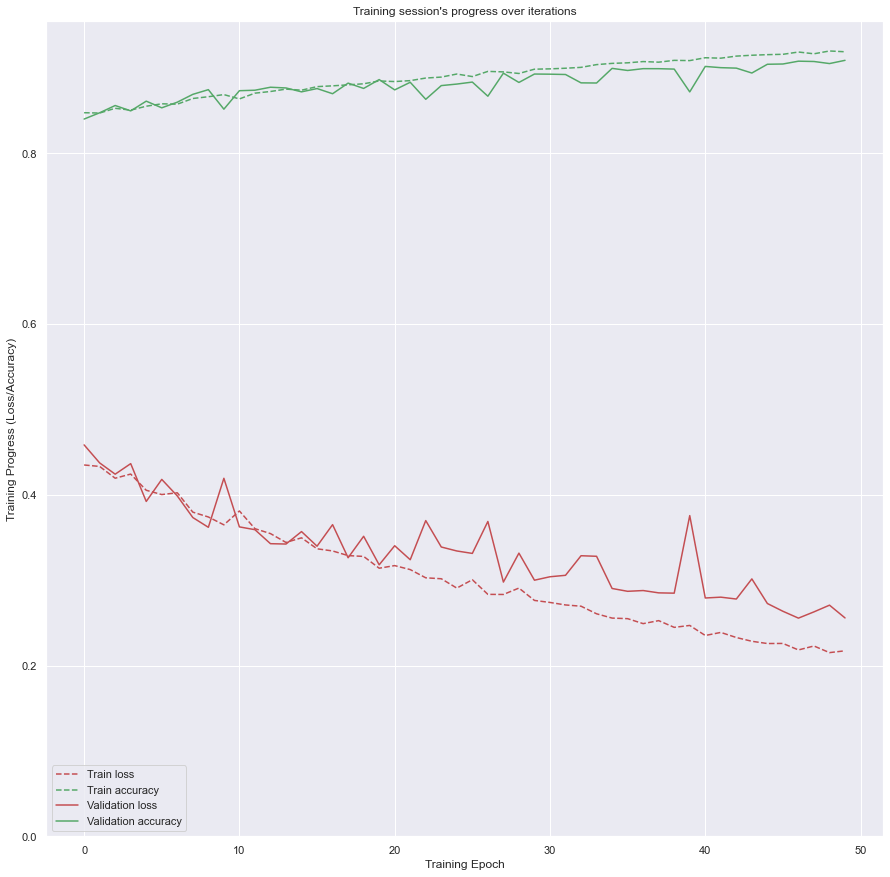

mean,std,min error on tr_loss: %.4f,%.4f,%.4f (0.3053531539440155, 6.472762677163817, 0.21513326466083527)
mean,std,min error on tr_acc: %.4f,%.4f,%.4f (0.8888367176055908, 2.144487236777705, 0.8471359610557556)
mean,std,min error on val_loss: %.4f,%.4f,%.4f (0.33434062361717226, 5.150479973829163, 0.2555391192436218)
mean,std,min error on val_acc: %.4f,%.4f,%.4f (0.8815021181106567, 1.7598288277433642, 0.8400940299034119)


In [42]:
plt.plot(np.array(history1.history1['loss']), "r--", label = "Train loss")
plt.plot(np.array(history1.history1['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history1.history1['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history1.history1['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

from numpy import mean
from numpy import std

tr_loss=history.history['loss']
tr_acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']

print('mean,std,min error on tr_loss: %.4f,%.4f,%.4f',(mean(tr_loss),std(tr_loss)*100,min(tr_loss)))
print('mean,std,min error on tr_acc: %.4f,%.4f,%.4f',(mean(tr_acc),std(tr_acc)*100,min(tr_acc)))
print('mean,std,min error on val_loss: %.4f,%.4f,%.4f',(mean(val_loss),std(val_loss)*100,min(val_loss)))
print('mean,std,min error on val_acc: %.4f,%.4f,%.4f',(mean(val_acc),std(val_acc)*100,min(val_acc)))

843/843 [==============================] - 24s 19ms/step


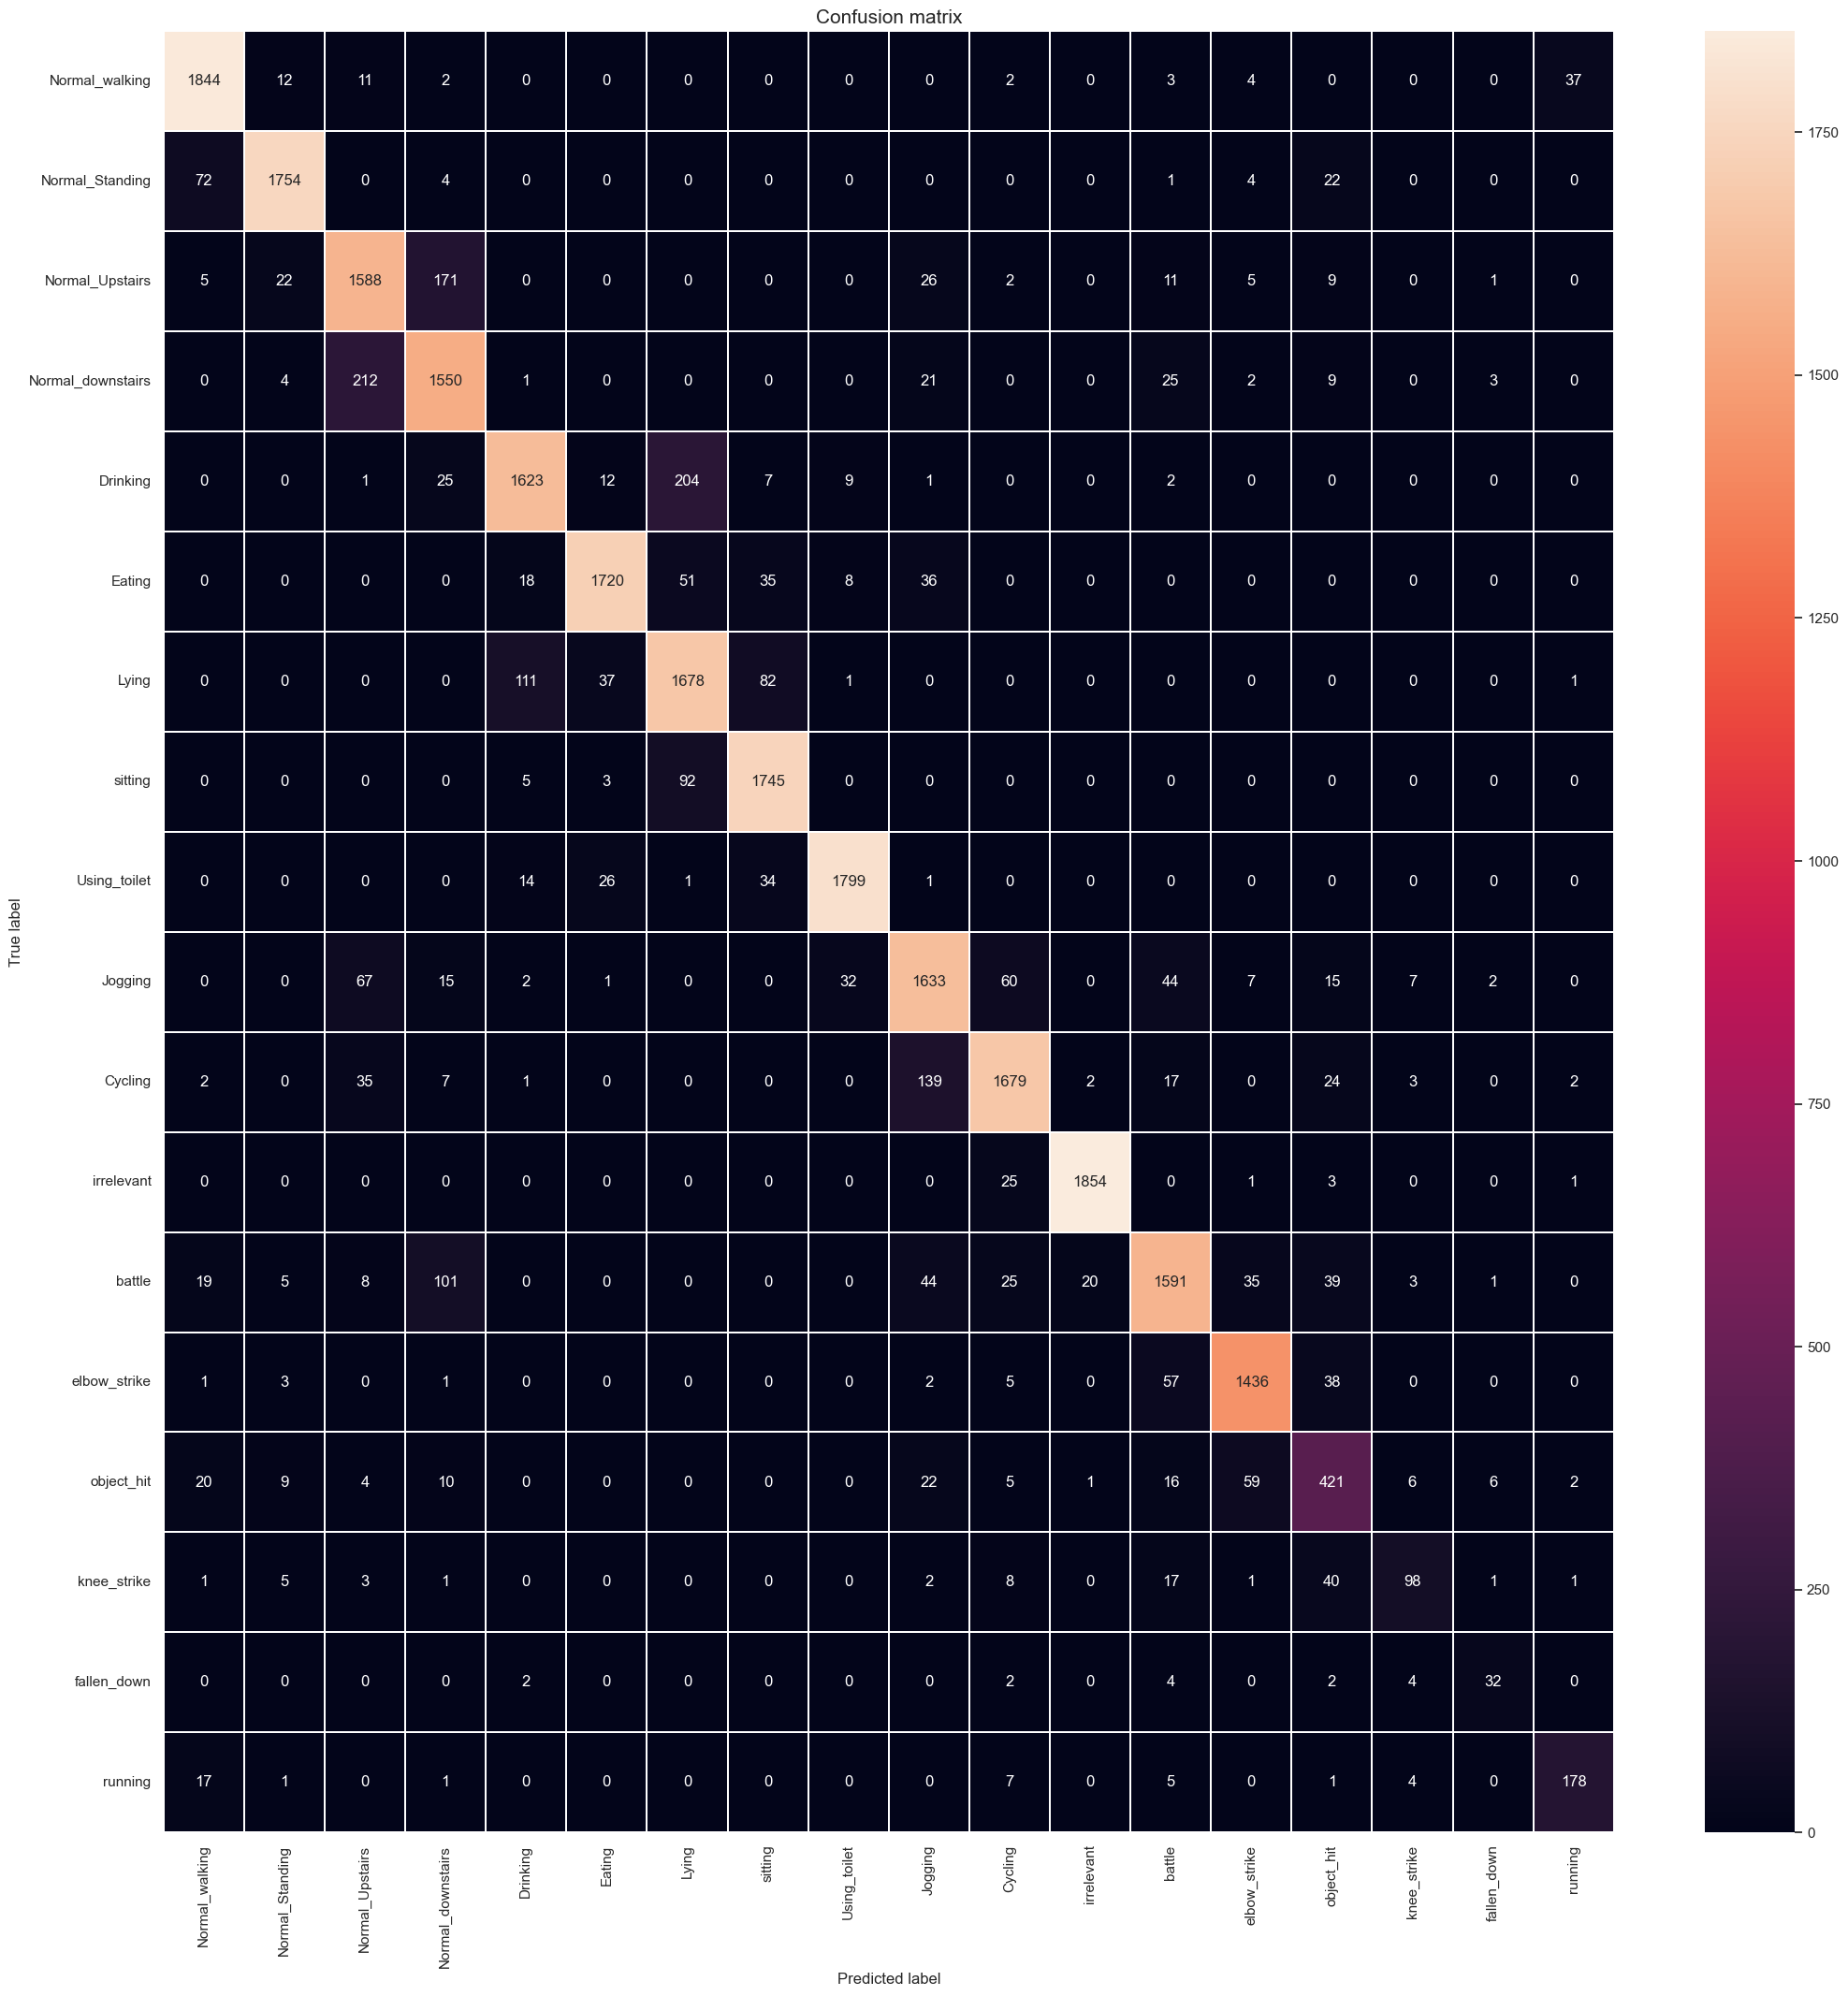

In [38]:
predictions = classifier.predict(X_test)
class_labels = ["Normal_walking",
                'Normal_Standing',
                'Normal_Upstairs',
                'Normal_downstairs',
                'Drinking','Eating',"Lying","sitting",
                "Using_toilet","Jogging","Cycling","irrelevant",
              "battle","elbow_strike","object_hit","knee_strike","fallen_down","running"]
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(25, 25))
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusionM1.png')
plt.show()

1287/1287 [==============================] - 39s 30ms/step


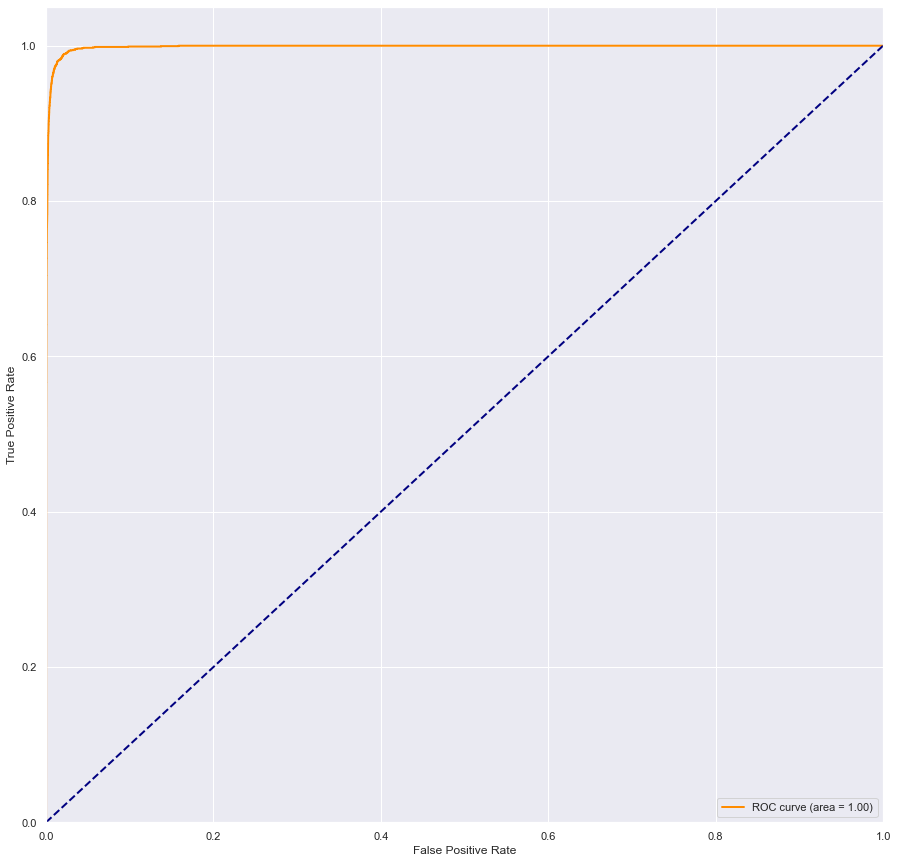

In [47]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 22 # number of class

y_pred = classifier.predict(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 3. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

In [48]:
classifier.save("modelalltry2.h5")